Import Common Packages

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

%matplotlib inline

In [879]:
# Read Data

df=pd.read_csv('InsuranceClean.csv')
df1=df.copy()

In [880]:
pd.options.display.max_columns = 99

In [881]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime,balanse
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,Not contacted,825,826,0,1,up to 1500$
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,Not contacted,889,892,0,3,up to 1500$
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,990,996,1,6,up to 1000$
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,Not contacted,726,740,1,14,up to 500$
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,Not contacted,875,878,0,3,above 2000$


## DATA PREPARATION

### Feature Selection

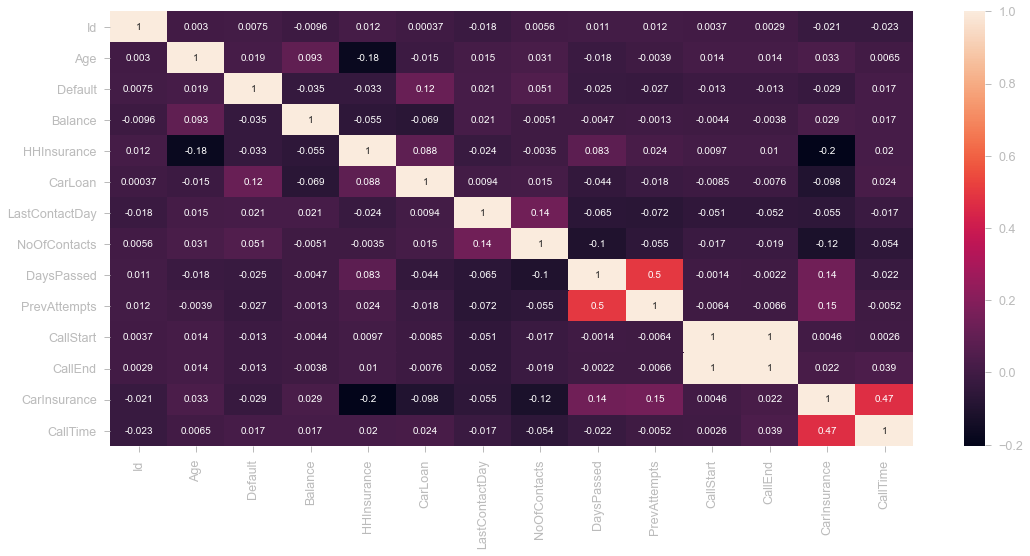

In [882]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

- Checking Correlation between target feature with other numerical features.
### Initial Hypothesis
- HHInsurance, No of Contacts, Days passed, PrevAttempts and Call Time have a good correlation with target feature
- We cannot determined the feature selection only based on df.corr(). So I will get the feature based on the EDA.
- in Object types of feature I will use Job, Marital, Education and outcome based on the EDA section

### FEATURE ENGINEERING

In [883]:
# Convert last contact month to numerical
df.loc[df['LastContactMonth']=='jan','LastContactMonth'] = 1
df.loc[df['LastContactMonth']=='feb','LastContactMonth'] = 2
df.loc[df['LastContactMonth']=='mar','LastContactMonth'] = 3
df.loc[df['LastContactMonth']=='apr','LastContactMonth'] = 4
df.loc[df['LastContactMonth']=='may','LastContactMonth'] = 5
df.loc[df['LastContactMonth']=='jun','LastContactMonth'] = 6
df.loc[df['LastContactMonth']=='jul','LastContactMonth'] = 7
df.loc[df['LastContactMonth']=='aug','LastContactMonth'] = 8
df.loc[df['LastContactMonth']=='sep','LastContactMonth'] = 9
df.loc[df['LastContactMonth']=='oct','LastContactMonth'] = 10
df.loc[df['LastContactMonth']=='nov','LastContactMonth'] = 11
df.loc[df['LastContactMonth']=='dec','LastContactMonth'] = 12

In [884]:
df['LastContactMonth'] = df['LastContactMonth'].astype('int64')
# Convert into int64 types

In [885]:
# Binning
bin_month = [0,3,6,9,12]
label_month = ['q1','q2','q3', 'q4']
df['bin_month'] = pd.cut(df['LastContactMonth'], bins = bin_month, labels = label_month)

In [886]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime,balanse,bin_month
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,1,2,-1,0,Not contacted,825,826,0,1,up to 1500$,q1
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,5,5,-1,0,Not contacted,889,892,0,3,up to 1500$,q2
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,6,1,119,1,failure,990,996,1,6,up to 1000$,q2
3,4,25,student,single,primary,0,373,1,0,cellular,11,5,2,-1,0,Not contacted,726,740,1,14,up to 500$,q2
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,6,1,-1,0,Not contacted,875,878,0,3,above 2000$,q2


### Recategorized

In [887]:
df.loc[(df['Job']=='student') | (df['Job']=='retired') | (df['Job']=='unemployed'), 'Job'] = 'Not Working'

In [888]:
df.loc[(df['Job']=='self-employed') | (df['Job']=='entrepreneur') | (df['Job']=='housemaid') | (df['Job']=='blue-collar'), 'Job'] = 'Other Job'

In [889]:
df.loc[(df['Job']=='management') | (df['Job']=='admin.') | (df['Job']=='technician') | (df['Job']=='services'), 'Job'] = 'Formal Job'

In [867]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime,balanse,bin_month
0,1,32,Formal Job,single,tertiary,0,1218,1,0,telephone,28,1,2,-1,0,Not contacted,825,826,0,1,up to 1500$,q1
1,2,32,Other Job,married,primary,0,1156,1,0,cellular,26,5,5,-1,0,Not contacted,889,892,0,3,up to 1500$,q2
2,3,29,Formal Job,single,tertiary,0,637,1,0,cellular,3,6,1,119,1,failure,990,996,1,6,up to 1000$,q2
3,4,25,Not Working,single,primary,0,373,1,0,cellular,11,5,2,-1,0,Not contacted,726,740,1,14,up to 500$,q2
4,5,30,Formal Job,married,tertiary,0,2694,0,0,cellular,3,6,1,-1,0,Not contacted,875,878,0,3,above 2000$,q2


#### LABEL ENCODING

In [868]:
from sklearn.preprocessing import LabelEncoder

In [869]:
# df['Communication_encode'] = LabelEncoder().fit_transform(df['Communication'])

In [890]:
df['balanse'].unique()

array(['up to 1500$', 'up to 1000$', 'up to 500$', 'above 2000$',
       'up to 2000$'], dtype=object)

In [891]:
df['balanse_encode'] = df['balanse'].map({'up to 500$': 0, 'up to 1000$': 1, 'up to 1500$': 2, 'up to 2000$':3, 'above 2000$':4})

#### ONE HOT ENCODING

In [892]:
df = pd.get_dummies(df, columns=['Job'], drop_first=True)

In [893]:
df.shape

(3735, 24)

In [894]:
df.head()

,Id,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,CallTime,balanse,bin_month,balanse_encode,Job_Not Working,Job_Other Job
0,1,32,single,tertiary,0,1218,1,0,telephone,28,1,2,-1,0,Not contacted,825,826,0,1,up to 1500$,q1,2,0,0
1,2,32,married,primary,0,1156,1,0,cellular,26,5,5,-1,0,Not contacted,889,892,0,3,up to 1500$,q2,2,0,1
2,3,29,single,tertiary,0,637,1,0,cellular,3,6,1,119,1,failure,990,996,1,6,up to 1000$,q2,1,0,0
3,4,25,single,primary,0,373,1,0,cellular,11,5,2,-1,0,Not contacted,726,740,1,14,up to 500$,q2,0,1,0
4,5,30,married,tertiary,0,2694,0,0,cellular,3,6,1,-1,0,Not contacted,875,878,0,3,above 2000$,q2,4,0,0


#### TRAIN TEST SPLIT

In [895]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [902]:
X = df.drop(columns=['Id','Communication','LastContactDay','CallStart','CallEnd','CarInsurance','balanse','Balance','Default','Outcome','bin_month','Education','Marital'])
y = df['CarInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, stratify=y, random_state=666)

# Memisah data untuk train sebanyak 85% dan test 15% dan stratify agar data yang diambil dari carInsurance 0 dan 1 sama banyak persentasenya.

In [903]:
print(X_train.shape)
print(X_test.shape)

# cek jumlah data train dan test

(2988, 11)
(747, 11)


In [904]:
X_train.head()

,Age,HHInsurance,CarLoan,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallTime,balanse_encode,Job_Not Working,Job_Other Job
1704,35,1,0,5,1,-1,0,3,4,0,0
947,34,1,0,5,1,-1,0,14,4,0,1
637,36,1,0,11,2,110,3,2,4,0,0
1084,47,1,0,6,12,-1,0,2,0,0,0
1041,25,1,0,7,1,-1,0,15,3,1,0


## Machine Learning Modelling

- The Model will focus on recall 1, to reduce the error of machine predicted not interested but actual interested.

#### Logistic Regression

In [905]:
from sklearn.linear_model import LogisticRegression

In [906]:
modelLR = LogisticRegression()

In [907]:
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [908]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score

In [909]:
print(classification_report(y_test, y_predLR))

# The Recall 1 score is 72% with the accuracy score of 81%
# Since the Goals is to reduce the error of machine predicting not interested but actual interested so I will try to increase the recall 1

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       438
           1       0.79      0.72      0.75       309

    accuracy                           0.81       747
   macro avg       0.80      0.79      0.80       747
weighted avg       0.81      0.81      0.80       747



In [910]:
# accuracy_score(y_test, y_predLR)

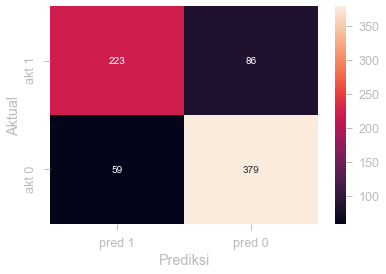

In [911]:
cm_LR = confusion_matrix(y_test, y_predLR, labels=[1,0])
df_LR = pd.DataFrame(data=cm_LR, index=['akt 1', 'akt 0'], columns=['pred 1', 'pred 0'])
sns.heatmap(df_LR, annot=True, fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# data 747 jumlah test data, Jumlah FN 86 dan FP 59, yang artinya machine menebak tidak tertarik tetapi aktual tertarik sejumlah 86 data

In [912]:
# df1.head()

In [913]:
# df1 = pd.get_dummies(df1, columns=['Job', 'bin_month','Marital','Education','Outcome'])

In [914]:
# X = df1.drop(columns=['Id','Communication','LastContactDay','CallStart','CallEnd','CarInsurance','balanse','Balance'])
# y = df1['CarInsurance']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.85, stratify=y, random_state=666)

#### Random Forest

In [915]:
from sklearn.ensemble import RandomForestClassifier

In [916]:
%%time
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

Wall time: 322 ms


RandomForestClassifier()

In [917]:
%%time
y_base_RF = model_rf.predict(X_test)
y_base_train = model_rf.predict(X_train)

Wall time: 82 ms


In [945]:
cm_base_rf = confusion_matrix(y_test, y_base_RF, labels=[1,0])
df_base_rf = pd.DataFrame(data=cm_base_rf, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_base_RF));
print(recall_score(y_test, y_base_RF))
# Dengan menggunakan model Random Forest Recall score naik dibanding dengan logistic regression
# tingkat akurasi juga naik dibanding Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       438
           1       0.79      0.80      0.79       309

    accuracy                           0.83       747
   macro avg       0.82      0.82      0.82       747
weighted avg       0.83      0.83      0.83       747

0.7961165048543689


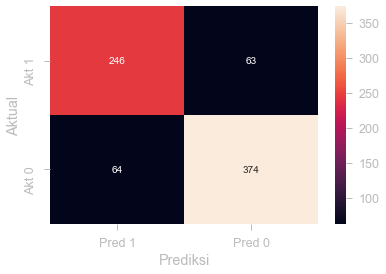

In [919]:
sns.heatmap(df_base_rf, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# dari 747 jumlah data machine menebak client tidak tertarik padahal aktualnya tertarik sebanyak 63 kali
# dan menebak client tertarik aktualnya tidak tertarik sebanyak 64 kali

#### XGB

In [920]:
import xgboost as xgb
from xgboost import XGBClassifier

In [921]:
%%time
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_base_XGB = model_xgb.predict(X_test)
y_xgb_train = model_xgb.predict(X_train)

Wall time: 123 ms


In [922]:
cm_base_xgb = confusion_matrix(y_test, y_base_XGB, labels=[1,0])
df_base_xgb = pd.DataFrame(data=cm_base_xgb, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_base_XGB));

# Menggunakan Model XGB juga terlihat recall score lebih baik dibanding Logistic Regression dan kurang lebih sama dengan Random Forest

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       438
           1       0.81      0.80      0.80       309

    accuracy                           0.84       747
   macro avg       0.83      0.83      0.83       747
weighted avg       0.84      0.84      0.84       747



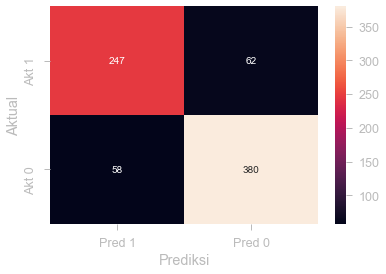

In [923]:
sns.heatmap(df_base_xgb, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# dari 747 jumlah data machine menebak client tidak tertarik padahal aktualnya tertarik sebanyak 62 kali
# dan menebak client tertarik aktualnya tidak tertarik sebanyak 58 kali

## HYPER PARAMETER TUNING

In [924]:
#### Logistic Regression HPT

In [925]:
LR = LogisticRegression()

In [926]:
param_LR = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'max_iter': [100,500],
            'C': [1,1.5,0.75],
            'tol': [0.0001,0.0005,.0007],
           }

In [927]:
Tune_LR = GridSearchCV(LR, param_grid=param_LR, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
Tune_LR.fit(X_train, y_train) 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.1s finished
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 1.5, 0.75], 'max_iter': [100, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.0001, 0.0005, 0.0007]},
             scoring='recall', verbose=1)

In [928]:
Tune_LR.best_params_

{'C': 0.75, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       438
           1       0.78      0.73      0.75       309

    accuracy                           0.80       747
   macro avg       0.80      0.79      0.79       747
weighted avg       0.80      0.80      0.80       747



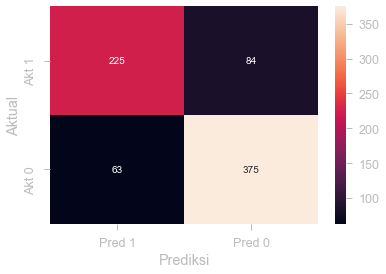

In [929]:
model_Tune_LR = Tune_LR.best_estimator_
y_tune_lr = model_Tune_LR.predict(X_test)
cm_tune_lr = confusion_matrix(y_test, y_tune_lr, labels=[1,0])
df_tune_lr = pd.DataFrame(data=cm_tune_lr, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_lr));
sns.heatmap(df_tune_lr, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# Setelah dituning terlihat dari confusion matrix bahwa recall score naik 0.01

#### Random Forest HPT

In [930]:
RF_tuned = RandomForestClassifier()
param_RF = {'n_estimators': [2000,5000],
            'max_depth': [None,5,7,8,10,12],
            'min_samples_split': [2,10,20],
            'max_features': ['auto',5,10],
            'random_state': [2]
           }

In [931]:
model_RF = RandomizedSearchCV(RF_tuned, param_distributions=param_RF, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_RF.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 7, 8, 10, 12],
                                        'max_features': ['auto', 5, 10],
                                        'min_samples_split': [2, 10, 20],
                                        'n_estimators': [2000, 5000],
                                        'random_state': [2]},
                   scoring='recall', verbose=1)

In [932]:
model_RF.best_params_

{'random_state': 2,
 'n_estimators': 2000,
 'min_samples_split': 20,
 'max_features': 5,
 'max_depth': 12}

In [944]:
model_tuned_RF = model_RF.best_estimator_
y_tune_rf = model_tuned_RF.predict(X_test)
cm_tune_rf = confusion_matrix(y_test, y_tune_rf, labels=[1,0])
df_tune_rf = pd.DataFrame(data=cm_tune_rf, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_rf));
print(recall_score(y_test, y_tune_rf))

# Dapat dilihat bahwa recall score naik  0.003 dan accuracy naik 0.01 dibandingkan dengan base modelnya

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       438
           1       0.81      0.80      0.80       309

    accuracy                           0.84       747
   macro avg       0.83      0.83      0.83       747
weighted avg       0.84      0.84      0.84       747

0.7993527508090615


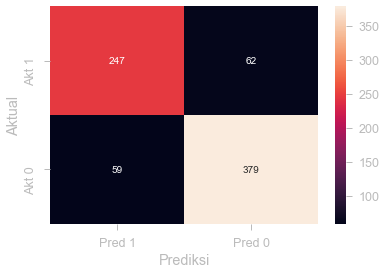

In [942]:
sns.heatmap(df_tune_rf, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# Dari 747 data test terdapat FN 62 dan FP 59 yang mengindikasikan bahwa model menebak 0 aktual 1 sebanyak 62 kali dan model menebak 1 dan aktual 0 sebanyak 59 kali

In [934]:
y_tune_rf_train = model_tuned_RF.predict(X_train)
print((accuracy_score(y_train, y_tune_rf_train)).round(2))
print((accuracy_score(y_test, y_tune_rf)).round(2))

0.8741633199464525
0.8380187416331994


### XGB HPT

In [935]:
XGB_Tuned = XGBClassifier()
param_xgb = {'max_depth': [None, 1, 5],
             'learning_rate': [0.100000012,0.300000012,0.600000012] , 
             'n_estimators': [1000], 
             'gamma': [0,.5], 
             'colsample_bytree': [1,0.5],
             'subsample': [1], 
             'reg_alpha':[0,0.5] ,
             'reg_lambda': [1,0.8],
             'random_state': [55]
            }

In [936]:
model_XGB = GridSearchCV(XGB_Tuned, param_grid =param_xgb, cv= 5, n_jobs= -1, verbose= 1, scoring='recall')
model_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.2min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1,

In [937]:
model_XGB.best_params_

{'colsample_bytree': 1,
 'gamma': 0.5,
 'learning_rate': 0.300000012,
 'max_depth': 5,
 'n_estimators': 1000,
 'random_state': 55,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 1}

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       438
           1       0.81      0.82      0.82       309

    accuracy                           0.85       747
   macro avg       0.84      0.84      0.84       747
weighted avg       0.85      0.85      0.85       747



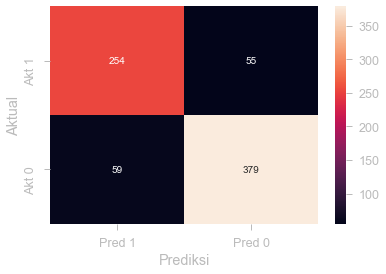

In [938]:
model_tuned_XGB = model_XGB.best_estimator_
y_tune_xgb = model_tuned_XGB.predict(X_test)
cm_tune_xgb = confusion_matrix(y_test, y_tune_xgb, labels=[1,0])
df_tune_xgb = pd.DataFrame(data=cm_tune_xgb, index=['Akt 1', 'Akt 0'], columns=['Pred 1', 'Pred 0'])
print(classification_report(y_test, y_tune_xgb));
sns.heatmap(df_tune_xgb, annot=True,fmt='d');
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

# Dari hasil tuning, recall score dan accuracy naik 0.02 dibanding base modelnya
# Dari 747 data test, FN sejumlah 55 dan FP 59 yang mengindikasikan bahwa model menebak 0 tapi aktual 1 sebanyak 55 kali dan model menebak 1 tapi aktual 0 sebanyakk 59 kali

In [939]:
y_tune_xgb_train = model_tuned_XGB.predict(X_train)
print(accuracy_score(y_train, y_tune_xgb_train))
print(accuracy_score(y_test, y_tune_xgb))

# Namun terlihat masih overfit data train dibanding data testnya

0.9170013386880856
0.8473895582329317


In [946]:
LRbase = recall_score(y_test, y_predLR)
RF_base = recall_score(y_test, y_base_RF)
XGB_base = recall_score(y_test, y_base_XGB)
LR_tuned = recall_score(y_test, y_tune_lr)
RF_tuned = recall_score(y_test, y_tune_rf)
XGB_tuned = recall_score(y_test, y_tune_xgb)

In [947]:
data={
    'LR': [LRbase],
    'RF': [RF_base],
    'XGB': [XGB_base],
    'LR_tuned': [LR_tuned],
    'RF_tuned': [RF_tuned],
    'XGB_tuned': [XGB_tuned]
}

(pd.DataFrame(data, index=['Recall Score']).T).sort_values('Recall Score',ascending=False)

# Dari hasil komparasi tiap model, XGB Hyper Parameter Tuning mempunyai hasil recall score tertinggi tapi tidak cukup reliable dikarenakan perbedaan cukup besar antara data train vs data test
# Sehingga menggunakan Random Forest yang sudah di Hyper Parameter Tuning merupakan pilihan terbaik karena data train vs train tidak berbeda jauh.

,Recall Score
XGB_tuned,0.822006
XGB,0.799353
RF_tuned,0.799353
RF,0.796117
LR_tuned,0.728155
LR,0.721683


## CONCLUSION

The highest Recall Score coming from Random Forest with Hyper parameter Tuning and the accuracy also the highest compared to other model

- The amount of customer who agreed to get insurance mostly in up to 500 and up to 2,000$
- Half of the Customer who doesnt insured their Household are more likely to get car insurance, 51 percent of them are decided to get car Insurance
- Meanwhile the customer who insured their household are only 31% of them get the car insurance
- Customers who contacted more than 8 times for 1 campaign are more unlikely to get insurance, while the customer who first time contacted for the campaign has the highest rate to get insurance car
- The majority of customers are havent been previously contacted, while the top 9 customer last contacted are above 90 days.
- The customers occupation as a student surprisingly has the beest response rate with 67 percent of them are decide to get the car Insurance
- Unemployed and retired occupation followed with 59 percent yes response rate. Then followed by management and admin with 45 percent and 40 percent
- The top 3 response rate are coming from customers who "didnt have a job" type of occupation.
- Customer who is single and divorced are more likely to get Car Insurance compared to the married customer
- Customer who in secondary education are the highest amount of getting car insurance from the yes rate, 
- Customers with tertiary education are more likely to get insurance with a 48 percent rate
- The company contacted mostly performed on May to Aug, but from this data we can see that the most effective or success rate of contact were not on those months.
- Dec, Sep and Mar are the most effective month with 80 - 83 percent success rate!, Followed by oct 77 percent, apr 52 and feb 51 percent success rate.
- Customer with success outcome on previous marketing campaign are more likely to get the car Insurance.
- Even compared to the failure attempts on Previous campaign, the not contacted customers on previous marketing campaign has the lowest success rate percentage to get car insurance.
- The longer the CallTime the higher the success rate. Though there are some exception on the minutes 36 and 51 because the number of times performed only 1 and its a no response or customer didnt get the car insurance

## SUGGESTION

- The bank should approach client with occupation of Students, retired, unemployed with balance below $500 have been contacted less than 5 times and still single and doesnt have other insurance product with calltime more than 30 minutes are more likely to get the car Insurance.


## DEPLOY


In [948]:
import joblib

In [949]:
joblib.dump(model_tuned_RF, 'ModelCarInsurance')

['ModelCarInsurance']

In [960]:
df1 = df.copy()

In [961]:
df1 = df1.drop(columns=['Id','Communication','LastContactDay','CallStart','CallEnd','balanse','Balance','Default','Outcome','bin_month','Education','Marital'])

In [962]:
df1.to_csv('InsuranceFinal.csv',index=False)

In [963]:
df1.head()

,Age,HHInsurance,CarLoan,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,CallTime,balanse_encode,Job_Not Working,Job_Other Job
0,32,1,0,1,2,-1,0,0,1,2,0,0
1,32,1,0,5,5,-1,0,0,3,2,0,1
2,29,1,0,6,1,119,1,1,6,1,0,0
3,25,1,0,5,2,-1,0,1,14,0,1,0
4,30,0,0,6,1,-1,0,0,3,4,0,0
